## esegui all'inizio

In [1]:
import h5py
import os
import numpy as np
import numpy as np
from tensorflow.keras.models import load_model

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
import pymrmr
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

import os

# Imposta la variabile di ambiente
os.environ['LOKY_MAX_CPU_COUNT'] = '14'


# Percorso del file HDF5 da cui caricare i dati
#load_path = "/Users/alessiamenozzi/Desktop/ThesisPlaques/classificator_data.h5"
load_path = "C:\\Users\\bsbar\\Desktop\\Tesi\\ThesisPlaques\\classificator_data.h5"

# Inizializza le liste per contenere i dati
loaded_class_images = []
loaded_class_labels = None
loaded_patients = None

# Apre il file HDF5 in modalità lettura
with h5py.File(load_path, 'r') as hf:
    # Itera su tutti i gruppi nel file HDF5
    for group_name in hf.keys():
        # Controlla se il nome del gruppo inizia con "patient_"
        if group_name.startswith("patient_"):
            group = hf[group_name]
            # Carica le immagini dal dataset 'images' all'interno del gruppo
            loaded_class_images.append(np.array(group['images']))
        elif group_name == "labels":
            # Carica le etichette dal dataset 'labels'
            loaded_class_labels = hf['labels'][:]
        elif group_name == "patients":
            # Carica i numeri dei pazienti dal dataset 'patients'
            loaded_patients = hf['patients'][:]

print(f"Dati caricati da {load_path}")
print(f"Numero di pazienti: {len(loaded_class_images)}")
print(f"Esempio di immagini per paziente: {loaded_class_images[0].shape}")


# Carica il file CSV
#file_path = "/Users/alessiamenozzi/Desktop/ThesisPlaques/data_rad_clin_DEF.csv"
file_path = "C:\\Users\\bsbar\\Desktop\\Tesi\\ThesisPlaques\\data_rad_clin_DEF.csv"
data = pd.read_csv(file_path)

# Lista degli ID da escludere
ids_to_exclude = ["patient_TC_19", "patient_TC_40", "patient_TC_88", "patient_TC_150", "patient_TC_193"]

# Filtra il DataFrame per escludere le righe con gli ID specificati
filtered_data = data[~data['IDs_new'].isin(ids_to_exclude)]

# Estrae i valori dalla colonna 'label' del DataFrame filtrato
labels_column = filtered_data['label']

# Converte i valori della colonna 'label' in numeri interi
labels = labels_column.astype(int).tolist()

labels=np.array(labels)
print("Labels:", labels)
print("Number of labels:", len(labels))


# Carica il modello encoder
#encoder = load_model("/Users/alessiamenozzi/Desktop/ThesisPlaques/encoder_models/encoder_model32.h5", compile=False)
#encoder = load_model("/Users/alessiamenozzi/Desktop/encoder64_senzaDense.h5", compile=False)
encoder = load_model("C:\\Users\\bsbar\\Desktop\\Tesi\\ThesisPlaques\\encoder_models\\encoder_model64.h5", compile=False)

# Funzione per ottenere le feature da una singola immagine
def get_features_from_image(image):
    image = image.astype('float32')
    image = image / 255.0
    # Ottieni le feature dall'encoder
    if len(image.shape) == 2:  # Se l'immagine è 64x64
        image = np.expand_dims(image, axis=-1)  # Aggiungi canale se necessario (per immagini in bianco e nero)
    image = np.expand_dims(image, axis=0)  # Aggiungi dimensione batch
    features = encoder.predict(image, verbose=False)
    features = np.squeeze(features)
    #print(features.shape)
    return np.array(features)

# Lista per salvare le feature delle immagini
patients = []

# Ottieni le feature per ogni immagine nella lista
for i in range(len(loaded_class_images)):
    features_list = []
    for img in loaded_class_images[i]:
        features = get_features_from_image(img)
        features_list.append(features)
    fetures_list = np.array(features_list)
    patients.append(features_list)

Dati caricati da C:\Users\bsbar\Desktop\Tesi\ThesisPlaques\classificator_data.h5
Numero di pazienti: 124
Esempio di immagini per paziente: (28, 64, 64)
Labels: [0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0
 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0
 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 1 0 1 0 1]
Number of labels: 124


## funzioni 1

In [159]:
## FILE DI FUNZIONI
import h5py
import os
import numpy as np
import numpy as np
from tensorflow.keras.models import load_model

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
#import pymrmr


from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc


def continue_array(filtered_patients, labels):
    all_features = []
    for patient in filtered_patients:
        for image_features in patient:
            all_features.append(image_features)

    all_features_array = np.array(all_features)

    # Print the shape of the combined features array
    #print(f"Shape of combined features array: {all_features_array.shape}")

    # Initialize the new expanded labels and patient IDs vectors
    expanded_labels = []
    expanded_patient_ids = []

    # Assuming labels and loaded_patients are already defined
    # labels: A list of length 124 with labels for each patient
    # loaded_patients: A list of length 124 with IDs for each patient

    # Iterate over the filtered patients and expand the labels and patient IDs
    for i in range(len(filtered_patients)):
        num_images = len(filtered_patients[i])  # Number of images for the current patient
        expanded_labels.extend([labels[i]] * num_images)  # Assign the same label to all images of the patient
        expanded_patient_ids.extend([loaded_patients[i]] * num_images)  # Assign the same patient ID to all images of the patient

    # Convert the lists to NumPy arrays
    expanded_labels_array = np.array(expanded_labels)
    expanded_patient_ids_array = np.array(expanded_patient_ids)

    # Print the shapes of the new arrays to verify
    #print(f"Shape of expanded labels array: {expanded_labels_array.shape}")
    #print(f"Shape of expanded patient IDs array: {expanded_patient_ids_array.shape}")
    return all_features_array, expanded_labels_array, expanded_patient_ids_array


def filter_highly_correlated_features(df, corr, threshold=0.85):
    columns = np.full((corr.shape[0],), True, dtype=bool)
    removed_features = []

    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if corr.iloc[i, j] >= threshold:
                if columns[j]:
                    columns[j] = False
                    removed_features.append(df.columns[j])

    #selected_columns = df.columns[columns]
    return removed_features



def remove_features_from_patients(patients, features_to_remove):
    # Estrai gli indici delle caratteristiche da rimuovere
    feature_indices_to_remove = [int(feature.split('_')[1]) for feature in features_to_remove]
    
    # Rimuovi le caratteristiche corrispondenti dagli array dei pazienti
    final_patients = []
    for patient in patients:
        new_patients = []
        for image_features in patient:
            new_patient = np.delete(image_features, feature_indices_to_remove, axis=0)
            new_patients.append(new_patient)
        final_patients.append(np.array(new_patients))    

    return final_patients


def keep_features_in_patients(patients, features_to_keep):
    # Converti le stringhe degli indici in interi
    feature_indices_to_keep = [int(feature) for feature in features_to_keep]

    final_patients = []
    for patient in patients:
        new_patients = []
        for image_features in patient:
            # Seleziona solo le caratteristiche specificate negli array dei pazienti
            new_patient = np.take(image_features, feature_indices_to_keep, axis=0)
            new_patients.append(new_patient)
        final_patients.append(np.array(new_patients))

    return final_patients



def perform_correlation(z_train, y_train, numero = 32, threshold = 0.85):
    # Supponiamo che loaded_patients contenga le etichette dei pazienti

    all_images, _, _= continue_array(z_train, y_train)

    # Creazione del DataFrame con le immagini come righe e le features come colonne
    df = pd.DataFrame(all_images, columns=[f'feature_{i}' for i in range(numero)])

    # Visualizzazione del DataFrame
    corr_matrix = df.corr()

    # Se vuoi anche visualizzare la matrice di correlazione con Seaborn
    #plt.figure(figsize=(12, 10))
    #sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    #plt.title("Feature Correlation Matrix")
    #plt.show()  
    
    features_selected = filter_highly_correlated_features(df, corr_matrix, threshold)
    
    return features_selected



## FEATURE SELECTION LASSO
def select_features_with_lasso(X, y, alpha=0.001):
    
    # Fit Lasso regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)

    # Get coefficients
    coefficients = lasso.coef_

    # Select features with non-zero coefficients
    selected_features = np.where(coefficients != 0)[0]

    # Create new feature matrix with only selected features
    X_selected = X[:, selected_features]

    return X_selected, selected_features

## FEATURE SELECTION LOGISTIC
def logistic_regression_feature_selection(X, y, num_features):
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(X, y)
    coef_abs = np.abs(lr.coef_)
    feature_importances = np.mean(coef_abs, axis=0)
    selected_features = feature_importances.argsort()[-num_features:][::-1]
    # Create new feature matrix with only selected features
    X_selected = X[:, selected_features]
    return X_selected, selected_features

## FEATURE SELECTION MRMR
def mrmr_feature_selection(X, y, num_features):
    feature_names = [f'feature_{i}' for i in range(X.shape[1])]
    data = pd.DataFrame(X, columns=feature_names)
    data['target'] = y
    data.columns = data.columns.astype(str)
    selected_features = pymrmr.mRMR(data, 'MIQ', num_features)
    selected_indices = [data.columns.get_loc(feature) for feature in selected_features]
    # Crea una nuova matrice delle caratteristiche con solo le caratteristiche selezionate
    X_selected = X[:, selected_indices]

    return X_selected, selected_indices

## FEATURE SELECTION RANDOM FOREST
def rf_feature_selection(X, y, num_features):
    # Inizializza il classificatore Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    # Addestra il modello
    rf.fit(X, y)
    # Ottieni l'importanza delle caratteristiche
    feature_importances = rf.feature_importances_
    # Seleziona gli indici delle caratteristiche più importanti
    selected_features = np.argsort(feature_importances)[-num_features:][::-1]
    # Crea una nuova matrice di caratteristiche con solo le caratteristiche selezionate
    X_selected = X[:, selected_features]
    return X_selected, selected_features

## FUNZIONE PER RIMUOVERE FEATURES SELEZIONATE
def filter_patients_features(filtered_patients, selected_features):
    """
    Removes the non-selected features from the filtered_patients array.

    Parameters:
    filtered_patients (list of numpy.ndarray): The list containing patients' images' features.
    selected_features (numpy.ndarray): The indices of the selected features.

    Returns:
    list of numpy.ndarray: The new filtered_patients array with only the selected features.
    """
    filtered_patients_selected = []

    for patient_features in filtered_patients:
        # Select only the features specified in selected_features
        patient_features_selected = patient_features[:, selected_features]
        filtered_patients_selected.append(patient_features_selected)

    return filtered_patients_selected

## funzioni 2 per la classificazione

### classificazione

In [3]:
from imblearn.over_sampling import ADASYN
def prob_to_binary(predictions_proba, threshold):
        final_predictionarray=[]          
        ## majority voting
        for p in predictions_proba:
            test_patient_predictions=[]
            for proba in p:               
                predictions_binary = 1 if proba[0][1] > threshold else 0
                test_patient_predictions.append(predictions_binary)
            count_0 = np.sum(np.array(test_patient_predictions)==0) 
            count_1 = np.sum(np.array(test_patient_predictions)==1)                                   
            final_prediction = 0 if count_0 > count_1 else 1
            final_predictionarray.append(final_prediction)
         
        return final_predictionarray


def classification_method1(selector, alpha, classifier, x_train_expanded, y_train_expanded, patients_test, y_test, features_test, num_features, thresholds=np.arange(0.001, 0.501, 0.001), mode = "Val", selected_features= [0]):

    if(mode == "Val"):
        selected_features = None  # Inizializziamo selected_features per prevenire l'errore UnboundLocalError
        
        if num_features != len(x_train_expanded[0]) or alpha != 0:
            if selector == "lasso":
                X_selected, selected_features = select_features_with_lasso(x_train_expanded, y_train_expanded, alpha)
            elif selector == "logistic": 
                X_selected, selected_features = logistic_regression_feature_selection(x_train_expanded, y_train_expanded, num_features)
            elif selector == "mrmr":
                X_selected, selected_features = mrmr_feature_selection(x_train_expanded, y_train_expanded, num_features)
            elif selector == "rf":
                X_selected, selected_features = rf_feature_selection(x_train_expanded, y_train_expanded, num_features)
            else:
                print("Wrong selector. Choose between: mrmr, rf, logistic, lasso")
                return
            
            features_test = filter_patients_features(features_test, selected_features)
        else:
            X_selected = x_train_expanded
            selected_features = list(range(len(x_train_expanded[0])))  # Selezioniamo tutte le feature se non si fa feature selection
        number_features = len(selected_features)  # Ora number_features è sempre definito correttamente
        
        if len(X_selected[0]) == 0:
            return 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
        
        #smote = SMOTE(random_state=42)
        adasyn = ADASYN(random_state=42)

        # Applicare SMOTE al set di dati di addestramento espanso
        #X_resampled, y_resampled = smote.fit_resample(X_selected, y_train_expanded)
        X_resampled, y_resampled = adasyn.fit_resample(X_selected, y_train_expanded)
        #print(X_selected, " vs Resampled ", X_resampled)
        #print(y_test, "vs resempled " , y_resampled)
        #classifier.fit(X_selected, y_train_expanded)
        classifier.fit(X_resampled, y_resampled)
   
    if (mode == "Test"):
        features_test = filter_patients_features(features_test, selected_features)
        number_features = len(selected_features)

    ### questo trova le probabilità e fa la media
    temp_array = []
    patient_scores = []

    for x in range(len(patients_test)):
        patient_predictions = []
        patient_predictions1 = []
        for i in range(len(features_test[x])):
            dato = features_test[x][i].reshape(1, -1)
            prediction = classifier.predict_proba(dato)
            prediction1 = classifier.predict_proba(dato)[:,1]
            patient_predictions.append(prediction)
            patient_predictions1.append(prediction1)
            mean=np.mean(patient_predictions1)

        patient_scores.append(mean) ## contiene la media delle probabilità
        temp_array.append(patient_predictions) ## contiene tutte le probabilità
    best_f1_score = 0
    best_threshold = None
    best_precision=0
    best_recall=0
    best_prediction=[]
    
    # Valuta le performance utilizzando diverse threshold
    #thresholds = np.arange(0.001, 0.501, 0.001)
    #thresholds=[0.5]
    if isinstance(thresholds, (int, float, complex)):
        thresholds=[thresholds]

    ## se non viene specificato usi il parametro di default 
    if(len(thresholds)!=1):
        for threshold in thresholds:
            binary_predictions = prob_to_binary(temp_array, threshold)
            f1 = f1_score(y_test, binary_predictions)
            if f1 > best_f1_score:
                best_f1_score = f1
                best_threshold = threshold
                best_precision = precision_score(y_test, binary_predictions)
                best_recall = recall_score(y_test, binary_predictions)
                best_prediction=binary_predictions

    else: ## qui vuol dire che è il set di test che usa la threshold migliore
        best_threshold = thresholds
        best_prediction=prob_to_binary(temp_array, best_threshold)
        best_f1_score = f1_score(y_test, best_prediction)
        best_precision = precision_score(y_test, best_prediction)
        best_recall = recall_score(y_test, best_prediction)

    #print(f"La migliore threshold è {best_threshold} con f1score di {best_f1_score} e precision {best_precision} e recall {best_recall}.")
    y_test= np.array(y_test)
    best_prediction=np.array(best_prediction)
    test_accuracy = accuracy_score(y_test, best_prediction)


    #test_precision = precision_score(y_test, best_prediction)
    #test_recall = recall_score(y_test, best_prediction)
    
    precision, recall, _ = precision_recall_curve(y_test, patient_scores)
    pr_auc = average_precision_score(y_test, patient_scores)

    #fpr, tpr, _ = roc_curve(y_test, best_prediction)
    roc_auc= roc_auc_score(y_test, patient_scores)


    conf= confusion_matrix(y_test, best_prediction)
    return best_f1_score, best_precision, best_recall, conf, test_accuracy, precision, recall, pr_auc, roc_auc, best_threshold, number_features, selected_features, classifier



In [163]:
def classification_method2(classifier, x_train_expanded, y_train_expanded, patients_test, y_test, features_test, thresholds):
       
    #smote = SMOTE(random_state=42)
    adasyn = ADASYN(random_state=42)

    X_resampled, y_resampled = adasyn.fit_resample(x_train_expanded, y_train_expanded)
    classifier.fit(X_resampled, y_resampled)
   


    ### questo trova le probabilità e fa la media
    temp_array = []

    for x in range(len(patients_test)):
        patient_predictions = []
        for i in range(len(features_test[x])):
            dato = features_test[x][i].reshape(1, -1)
            prediction = classifier.predict_proba(dato)
            patient_predictions.append(prediction)


        temp_array.append(patient_predictions) ## contiene tutte le probabilità
    best_f1_score = 0
    best_threshold = None
    best_precision=0
    best_recall=0
    best_prediction=[]
 
    if isinstance(thresholds, (int, float, complex)):
        thresholds=[thresholds]

    best_threshold = thresholds
    best_prediction=prob_to_binary(temp_array, best_threshold)
    best_f1_score = f1_score(y_test, best_prediction)
    best_precision = precision_score(y_test, best_prediction)
    best_recall = recall_score(y_test, best_prediction)

    y_test= np.array(y_test)
    best_prediction=np.array(best_prediction)
    test_accuracy = accuracy_score(y_test, best_prediction)


    conf= confusion_matrix(y_test, best_prediction)
    return best_f1_score, best_precision, best_recall, conf, test_accuracy



### best threshold

In [4]:
def find_best_threshold_features(results_rf, selector):
    best_thresholds = []
    best_num_features=[]
    best_alpha=[]

    fold_results = results_rf[selector]
        
        # Inizialmente, tutti gli indici con il massimo F1 score
    best_f1_indices = np.where(fold_results['f1'] == np.max(fold_results['f1']))[0]
        
    if len(best_f1_indices) > 1:
            # In caso di parità di F1, considera il pr_auc
            max_pr_auc = max(fold_results['pr_auc'][j] for j in best_f1_indices)
            best_f1_indices = [j for j in best_f1_indices if fold_results['pr_auc'][j] == max_pr_auc]
            # In caso di ulteriore parità, considera l'accuracy
            if len(best_f1_indices)!=1:
                max_accuracy = max(fold_results['accuracy'][j] for j in best_f1_indices)
                best_f1_indices = [j for j in best_f1_indices if fold_results['accuracy'][j] == max_accuracy]
                if len(best_f1_indices)!=1:
                    max_roc_auc = max(fold_results['roc_auc'][j] for j in best_f1_indices)
                    best_f1_indices = [j for j in best_f1_indices if fold_results['roc_auc'][j] == max_roc_auc]
                    #best_f1_indices= best_f1_indices[0]
           
    best_index = best_f1_indices[0]


    # Ottieni l'indice finale del miglior F1 score
    best_threshold=fold_results['best_threshold'][best_index]

    if selector == 'lasso':
        mean_param=fold_results['alpha'][best_index]
    else:
        mean_param=fold_results['num_features'][best_index]



    return best_threshold, mean_param


### plot results

In [5]:

# Supponiamo che tu abbia un elenco di colori predefiniti per i fold
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Supponiamo che results_rf sia un dizionario di dizionari dove:
# results_rf[i][selector] contiene i dati per il fold i e il selettore selector.
# results_test_rf contiene i dati per il set di test finale per ogni selector.

def plot_results(results_rf, results_test_rf, selector):

    # Plotta i risultati per PR AUC
    if selector == 'lasso':
        
        plt.figure()
        for i in range(len(results_rf)):
            fold_results = results_rf[i][selector]
            plt.plot(fold_results['alpha'], fold_results['pr_auc'], marker='o', linestyle='-', color=colors[i % len(colors)], label=f'Fold {i+1}')
        
        # Plot dei risultati del set di test
        plt.plot(results_test_rf[selector]['alpha'], results_test_rf[selector]['pr_auc'], marker='x', linestyle='--', color='black', label='Test Set')
        
        plt.xlabel('Alpha Values')
        plt.ylabel('AUC')
        plt.title(f'Alpha Values vs PR AUC for {selector} selector')
        plt.xscale('log')
        plt.legend()
        plt.show()

        # Plotta i risultati per ROC AUC
        plt.figure()
        for i in range(len(results_rf)):
            fold_results = results_rf[i][selector]
            plt.plot(fold_results['alpha'], fold_results['roc_auc'], marker='o', linestyle='-', color=colors[i % len(colors)], label=f'Fold {i+1}')
        
        # Plot dei risultati del set di test
        plt.plot(results_test_rf[selector]['alpha'], results_test_rf[selector]['roc_auc'], marker='x', linestyle='--', color='black', label='Test Set')
        
        plt.xlabel('Alpha Values')
        plt.ylabel('AUC')
        plt.title(f'Alpha Values vs ROC AUC for {selector} selector')
        plt.xscale('log')
        plt.legend()
        plt.show()


    else:
        plt.figure()
        for i in range(len(results_rf)):
            fold_results = results_rf[i][selector]
            plt.plot(fold_results['num_features'], fold_results['pr_auc'], marker='o', linestyle='-', color=colors[i % len(colors)], label=f'Fold {i+1}')
        
        # Plot dei risultati del set di test
        plt.plot(results_test_rf[selector]['num_features'], results_test_rf[selector]['pr_auc'], marker='x', linestyle='--', color='black', label='Test Set')
        
        plt.xlabel('Number of Features')
        plt.ylabel('AUC')
        plt.title(f'Number of Features vs PR AUC for {selector} selector')
        plt.xscale('linear')
        plt.legend()
        plt.show()

        # Plotta i risultati per ROC AUC
        plt.figure()
        for i in range(len(results_rf)):
            fold_results = results_rf[i][selector]
            plt.plot(fold_results['num_features'], fold_results['roc_auc'], marker='o', linestyle='-', color=colors[i % len(colors)], label=f'Fold {i+1}')
        
        # Plot dei risultati del set di test
        plt.plot(results_test_rf[selector]['num_features'], results_test_rf[selector]['roc_auc'], marker='x', linestyle='--', color='black', label='Test Set')
        
        plt.xlabel('Number of Features')
        plt.ylabel('AUC')
        plt.title(f'Number of Features vs ROC AUC for {selector} selector')
        plt.xscale('linear')
        plt.legend()
        plt.show()




## codice con split e cross val

In [141]:
#patients_train, patients_test, y_train, y_test, features_train, features_test= train_test_split(loaded_patients, labels, patients, test_size=0.2, shuffle=True, stratify=labels, random_state=46)

patients_train1, patients_test, y_train1, y_test, features_train1, features_test= train_test_split(loaded_patients, labels, patients, test_size=0.2, shuffle=False, random_state=1)
patients_train, patients_val, y_train, y_val, features_train, features_val= train_test_split(patients_train1, y_train1, features_train1, test_size=0.3, shuffle=True, stratify=y_train1, random_state=1)

print(patients_train.shape)
print(patients_train)
print(patients_test)
print(len(features_train))
print(len(features_train[0][0]))
print(len(features_train[1]))
print(len(features_train[2]))
print(patients_test.shape)




alpha_values = np.linspace(0, 0.006, 30).tolist()

selectors=['rf', 'logistic', 'lasso', 'mrmr']
#selectors=['rf', 'lasso', 'logistic']
classifiers=['RandomForest', 'Logistic', 'XgBoost', 'MLP', 'SVM']





(69,)
[102  70  95  53 111  78 113 115 129  33  61  27  75 104 146 133 120  84
 107  23  24  39 136 135  68  94  81  44  42  15  48 126  41  91  54  35
 117  17  65  89  98  82  96  90 119 139 127  43 112  92 118  59 100 144
 106 101  62 108  87  74  71  22 128 137 116  52 124 103 105]
[147 149 153 155 158 159 161 163 166 168 169 170 171 175 176 178 182 183
 188 189 190 197 199 200 205]
69
64
38
22
(25,)


## LOOP con tutti i selector e classificatori

In [31]:

results_test=[{} for _ in range(len(classifiers))]
results_val = [{} for _ in range(len(classifiers))]
i=0
for classifier in classifiers:
    print("Starting with classifier:", classifier)
    for selector in selectors: 
        print("Doing with selector:", selector)
        results_test[i][selector] = {
                'classifier': classifier,
                'alpha': [],
                'num_features': [],
                'pr_auc': [],
                'best_precision' :[],
                'best_recall':[],
                'roc_auc':[],
                'f1':[],
                'accuracy':[],
                'confusion_matrix':[],
                'best_threshold':[],
                'selected_features': []
                }
        results_val[i][selector] = {
                'classifier': classifier,
                'alpha': [],
                'num_features': [],
                'pr_auc': [],
                'best_precision' :[],
                'best_recall':[],
                'roc_auc':[],
                'f1':[],
                'accuracy':[],
                'confusion_matrix':[],
                'best_threshold':[],
                'selected_features': []
                }


        features=perform_correlation(features_train, y_train, 64, 0.85)

        final_patients_train=remove_features_from_patients(features_train, features)
        final_patients_test=remove_features_from_patients(features_test, features)
        final_patients_val=remove_features_from_patients(features_val, features)

        x_train_expanded, y_train_expanded, _ = continue_array(final_patients_train, y_train)

        if selector == 'lasso':
                for alpha in alpha_values:
                        print("sto facendo alpha:",alpha)

                        if(classifier=='RandomForest'):
                             classi = RandomForestClassifier(n_estimators=100, random_state=42)
                        if(classifier=='Logistic'):
                             classi = LogisticRegression()
                        if(classifier=='SVM'):
                             classi = SVC(kernel='rbf', probability=True, random_state=42)
                        if(classifier=='XgBoost'):
                             classi = XGBClassifier()
                        if(classifier=='MLP'):
                             classi = MLPClassifier(hidden_layer_sizes=(128,64, 32), max_iter=1000, random_state=42, early_stopping=True, learning_rate='adaptive')
                        
                        best_f1_score, best_precision, best_recall, conf, test_accuracy, precision, recall, pr_auc, roc_auc, bt, number_features, selected_features, classifier= classification_method1(
                            selector, alpha, classi, x_train_expanded, y_train_expanded, 
                            patients_val, y_val, final_patients_val, 0
                        )

                        if(best_f1_score==0 and best_precision==0 and best_recall==0):
                            break
                    
                        results_val[i][selector]['alpha'].append(alpha)
                        results_val[i][selector]['selected_features'].append(selected_features)
                        results_val[i][selector]['num_features'].append(number_features)
                        results_val[i][selector]['pr_auc'].append(pr_auc)
                        results_val[i][selector]['best_precision'].append(best_precision)
                        results_val[i][selector]['best_recall'].append(best_recall)
                        results_val[i][selector]['roc_auc'].append(roc_auc)
                        results_val[i][selector]['f1'].append(best_f1_score)
                        results_val[i][selector]['accuracy'].append(test_accuracy)
                        results_val[i][selector]['confusion_matrix'].append(conf)
                        results_val[i][selector]['best_threshold'].append(bt)

                        ## classifico il test

                        best_f1_score, best_precision, best_recall, conf, test_accuracy, precision, recall, pr_auc, roc_auc, bt, number_features, selected_features, _= classification_method1(
                                    selector, alpha, classifier, x_train_expanded, y_train_expanded, 
                                    patients_test, y_test, final_patients_test, 0, bt, "Test", selected_features)
                        
                        
                        results_test[i][selector]['alpha'].append(alpha)
                        results_test[i][selector]['num_features'].append(number_features)
                        results_test[i][selector]['selected_features'].append(selected_features)
                        results_test[i][selector]['pr_auc'].append(pr_auc)
                        results_test[i][selector]['best_precision'].append(best_precision)
                        results_test[i][selector]['best_recall'].append(best_recall)
                        results_test[i][selector]['roc_auc'].append(roc_auc)
                        results_test[i][selector]['f1'].append(best_f1_score)
                        results_test[i][selector]['accuracy'].append(test_accuracy)
                        results_test[i][selector]['confusion_matrix'].append(conf)
                        results_test[i][selector]['best_threshold'].append(bt)
                        
                        
                        # Plot dei risultati per 'lasso'
                        


        else:
                    for t in range(2, len(x_train_expanded[0])+1):
                         
                         print("sto facendo features:",t)
                         
                         if(classifier=='RandomForest'):
                             classi = RandomForestClassifier(n_estimators=100, random_state=42)
                         if(classifier=='Logistic'):
                             classi = LogisticRegression()
                         if(classifier=='SVM'):
                             classi = SVC(kernel='rbf', probability=True, random_state=42)
                         if(classifier=='XgBoost'):
                             classi = XGBClassifier()
                         if(classifier=='MLP'):
                             classi = MLPClassifier(hidden_layer_sizes=(128,64, 32), max_iter=1000, random_state=42, early_stopping=True, learning_rate='adaptive')
                         
                         best_f1_score, best_precision, best_recall, conf, test_accuracy, precision, recall, pr_auc, roc_auc, bt, _, selected_features, classifier= classification_method1(
                            selector, 0, classi, x_train_expanded, y_train_expanded, 
                            patients_val, y_val, final_patients_val, t
                        )
                         results_val[i][selector]['num_features'].append(t)
                         results_val[i][selector]['pr_auc'].append(pr_auc)
                         results_val[i][selector]['selected_features'].append(selected_features)
                         results_val[i][selector]['best_precision'].append(best_precision)
                         results_val[i][selector]['best_recall'].append(best_recall)
                         results_val[i][selector]['roc_auc'].append(roc_auc)
                         results_val[i][selector]['f1'].append(best_f1_score)
                         results_val[i][selector]['accuracy'].append(test_accuracy)
                         results_val[i][selector]['confusion_matrix'].append(conf)
                         results_val[i][selector]['best_threshold'].append(bt)

                         ## classifico test
                         best_f1_score, best_precision, best_recall, conf, test_accuracy, precision, recall, pr_auc, roc_auc, bt, number_features, selected_features, _= classification_method1(
                                        selector, 0, classifier, x_train_expanded, y_train_expanded, 
                                        patients_test, y_test, final_patients_test, t, bt, "Test", selected_features)
                         
                         results_test[i][selector]['num_features'].append(t)
                         results_test[i][selector]['selected_features'].append(selected_features)
                         results_test[i][selector]['pr_auc'].append(pr_auc)
                         results_test[i][selector]['best_precision'].append(best_precision)
                         results_test[i][selector]['best_recall'].append(best_recall)
                         results_test[i][selector]['roc_auc'].append(roc_auc)
                         results_test[i][selector]['f1'].append(best_f1_score)
                         results_test[i][selector]['accuracy'].append(test_accuracy)
                         results_test[i][selector]['confusion_matrix'].append(conf)
                         results_test[i][selector]['best_threshold'].append(bt)


        #mean_threshold, mean_param  = find_best_threshold_features(results_val[i], selector)
        #print(f"The mean best threshold for {selector} is: {mean_threshold}")
    
        
    i=i+1


 
        #plot_results(results_rf, results_test_rf, selector)

            

Starting with classifier: RandomForest
Doing with selector: rf
sto facendo features: 2
sto facendo features: 3
sto facendo features: 4
sto facendo features: 5
sto facendo features: 6
sto facendo features: 7
sto facendo features: 8
sto facendo features: 9
sto facendo features: 10
sto facendo features: 11
sto facendo features: 12
sto facendo features: 13
sto facendo features: 14
sto facendo features: 15
sto facendo features: 16
sto facendo features: 17
sto facendo features: 18
sto facendo features: 19
sto facendo features: 20
sto facendo features: 21
sto facendo features: 22
sto facendo features: 23
sto facendo features: 24
sto facendo features: 25
sto facendo features: 26
sto facendo features: 27
sto facendo features: 28
sto facendo features: 29
sto facendo features: 30
sto facendo features: 31
sto facendo features: 32
sto facendo features: 33
sto facendo features: 34
sto facendo features: 35
sto facendo features: 36
sto facendo features: 37
sto facendo features: 38
sto facendo features

c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+02, tolerance: 5.645e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mod

sto facendo alpha: 0.00020689655172413793
sto facendo alpha: 0.00041379310344827585
sto facendo alpha: 0.0006206896551724137
sto facendo alpha: 0.0008275862068965517
sto facendo alpha: 0.0010344827586206897
sto facendo alpha: 0.0012413793103448274
sto facendo alpha: 0.0014482758620689654
sto facendo alpha: 0.0016551724137931034
sto facendo alpha: 0.0018620689655172414
sto facendo alpha: 0.0020689655172413794
sto facendo alpha: 0.0022758620689655173
sto facendo alpha: 0.002482758620689655
sto facendo alpha: 0.002689655172413793
sto facendo alpha: 0.002896551724137931
sto facendo alpha: 0.003103448275862069
sto facendo alpha: 0.003310344827586207
sto facendo alpha: 0.003517241379310345
sto facendo alpha: 0.0037241379310344828
sto facendo alpha: 0.00393103448275862
sto facendo alpha: 0.004137931034482759
sto facendo alpha: 0.004344827586206896
sto facendo alpha: 0.004551724137931035
sto facendo alpha: 0.004758620689655172
sto facendo alpha: 0.00496551724137931
sto facendo alpha: 0.0051724

c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


sto facendo features: 46
sto facendo features: 47
sto facendo features: 48
sto facendo features: 49
sto facendo features: 50
sto facendo features: 51
sto facendo features: 52
sto facendo features: 53
sto facendo features: 54
Doing with selector: logistic
sto facendo features: 2
sto facendo features: 3
sto facendo features: 4
sto facendo features: 5
sto facendo features: 6
sto facendo features: 7
sto facendo features: 8
sto facendo features: 9
sto facendo features: 10
sto facendo features: 11
sto facendo features: 12
sto facendo features: 13
sto facendo features: 14
sto facendo features: 15
sto facendo features: 16
sto facendo features: 17
sto facendo features: 18
sto facendo features: 19
sto facendo features: 20
sto facendo features: 21
sto facendo features: 22
sto facendo features: 23
sto facendo features: 24
sto facendo features: 25
sto facendo features: 26
sto facendo features: 27
sto facendo features: 28
sto facendo features: 29
sto facendo features: 30
sto facendo features: 31
sto

c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+02, tolerance: 5.645e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mod

sto facendo alpha: 0.00020689655172413793
sto facendo alpha: 0.00041379310344827585
sto facendo alpha: 0.0006206896551724137
sto facendo alpha: 0.0008275862068965517
sto facendo alpha: 0.0010344827586206897
sto facendo alpha: 0.0012413793103448274
sto facendo alpha: 0.0014482758620689654
sto facendo alpha: 0.0016551724137931034
sto facendo alpha: 0.0018620689655172414
sto facendo alpha: 0.0020689655172413794
sto facendo alpha: 0.0022758620689655173
sto facendo alpha: 0.002482758620689655
sto facendo alpha: 0.002689655172413793
sto facendo alpha: 0.002896551724137931
sto facendo alpha: 0.003103448275862069
sto facendo alpha: 0.003310344827586207
sto facendo alpha: 0.003517241379310345
sto facendo alpha: 0.0037241379310344828
sto facendo alpha: 0.00393103448275862
sto facendo alpha: 0.004137931034482759
sto facendo alpha: 0.004344827586206896
sto facendo alpha: 0.004551724137931035
sto facendo alpha: 0.004758620689655172
sto facendo alpha: 0.00496551724137931
sto facendo alpha: 0.0051724

c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+02, tolerance: 5.645e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mod

sto facendo alpha: 0.00020689655172413793
sto facendo alpha: 0.00041379310344827585
sto facendo alpha: 0.0006206896551724137
sto facendo alpha: 0.0008275862068965517
sto facendo alpha: 0.0010344827586206897
sto facendo alpha: 0.0012413793103448274
sto facendo alpha: 0.0014482758620689654
sto facendo alpha: 0.0016551724137931034
sto facendo alpha: 0.0018620689655172414
sto facendo alpha: 0.0020689655172413794
sto facendo alpha: 0.0022758620689655173
sto facendo alpha: 0.002482758620689655
sto facendo alpha: 0.002689655172413793
sto facendo alpha: 0.002896551724137931
sto facendo alpha: 0.003103448275862069
sto facendo alpha: 0.003310344827586207
sto facendo alpha: 0.003517241379310345
sto facendo alpha: 0.0037241379310344828
sto facendo alpha: 0.00393103448275862
sto facendo alpha: 0.004137931034482759
sto facendo alpha: 0.004344827586206896
sto facendo alpha: 0.004551724137931035
sto facendo alpha: 0.004758620689655172
sto facendo alpha: 0.00496551724137931
sto facendo alpha: 0.0051724

c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+02, tolerance: 5.645e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mod

sto facendo alpha: 0.00020689655172413793
sto facendo alpha: 0.00041379310344827585
sto facendo alpha: 0.0006206896551724137
sto facendo alpha: 0.0008275862068965517
sto facendo alpha: 0.0010344827586206897
sto facendo alpha: 0.0012413793103448274
sto facendo alpha: 0.0014482758620689654
sto facendo alpha: 0.0016551724137931034
sto facendo alpha: 0.0018620689655172414
sto facendo alpha: 0.0020689655172413794
sto facendo alpha: 0.0022758620689655173
sto facendo alpha: 0.002482758620689655
sto facendo alpha: 0.002689655172413793
sto facendo alpha: 0.002896551724137931
sto facendo alpha: 0.003103448275862069
sto facendo alpha: 0.003310344827586207
sto facendo alpha: 0.003517241379310345
sto facendo alpha: 0.0037241379310344828
sto facendo alpha: 0.00393103448275862
sto facendo alpha: 0.004137931034482759
sto facendo alpha: 0.004344827586206896
sto facendo alpha: 0.004551724137931035
sto facendo alpha: 0.004758620689655172
sto facendo alpha: 0.00496551724137931
sto facendo alpha: 0.0051724

c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\bsbar\anaconda3\envs\iml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+02, tolerance: 5.645e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mod

sto facendo alpha: 0.00020689655172413793
sto facendo alpha: 0.00041379310344827585
sto facendo alpha: 0.0006206896551724137
sto facendo alpha: 0.0008275862068965517
sto facendo alpha: 0.0010344827586206897
sto facendo alpha: 0.0012413793103448274
sto facendo alpha: 0.0014482758620689654
sto facendo alpha: 0.0016551724137931034
sto facendo alpha: 0.0018620689655172414
sto facendo alpha: 0.0020689655172413794
sto facendo alpha: 0.0022758620689655173
sto facendo alpha: 0.002482758620689655
sto facendo alpha: 0.002689655172413793
sto facendo alpha: 0.002896551724137931
sto facendo alpha: 0.003103448275862069
sto facendo alpha: 0.003310344827586207
sto facendo alpha: 0.003517241379310345
sto facendo alpha: 0.0037241379310344828
sto facendo alpha: 0.00393103448275862
sto facendo alpha: 0.004137931034482759
sto facendo alpha: 0.004344827586206896
sto facendo alpha: 0.004551724137931035
sto facendo alpha: 0.004758620689655172
sto facendo alpha: 0.00496551724137931
sto facendo alpha: 0.0051724

In [64]:
val_backup = results_val
test_backup = results_test

## Salvataggio dizionari

In [166]:
import pickle

file_path = "C:\\Users\\bsbar\\Desktop\\results\\results_val64.pkl"
#file_path =

# Salvare i risultati in file pickle
with open(file_path, 'wb') as file:
    pickle.dump(results_val, file)

file_path = "C:\\Users\\bsbar\\Desktop\\results\\results_test64.pkl"
#file_path =

with open(file_path, 'wb') as file:
    pickle.dump(results_test, file)

print("File Pickle creati con successo.")

File Pickle creati con successo.


In [167]:
file_path = "C:\\Users\\bsbar\\Desktop\\results\\results_val64.pkl"
#file_path =
with open(file_path, 'rb') as file:
    results_val = pickle.load(file)

file_path = "C:\\Users\\bsbar\\Desktop\\results\\results_test64.pkl"
#file_path =
with open(file_path, 'rb') as file:
    results_test = pickle.load(file)

print("File Pickle caricati con successo.")

File Pickle caricati con successo.


## Stampe classifiers e selectors

### ROC

In [ ]:
import matplotlib.pyplot as plt

# Definizione di colori diversi per ogni selettore
colors = {
    'lasso': 'blue',
    'logistic': 'green',  # sostituire con il nome effettivo del selettore
    'mrmr': 'red',    # sostituire con il nome effettivo del selettore
    'rf': 'orange'
    # aggiungere altri selettori se necessario
}

# Itera attraverso i classificatori e crea i grafici
for i, classifier in enumerate(classifiers):
    plt.figure(figsize=(10, 6))
    for selector in selectors:
        num_features = results_val[i][selector]['num_features']
        roc_auc = results_val[i][selector]['roc_auc']  # Utilizzo di roc_auc anziché pr_auc

        plt.plot(num_features, roc_auc, marker='o', label=selector, color=colors.get(selector, 'black'))

    plt.title(f'Performance di ROC AUC per il classificatore: {classifier}')
    plt.xlabel('Numero di funzionalità')
    plt.ylabel('ROC AUC')
    plt.legend()
    plt.grid(True)
    plt.show()


### PR

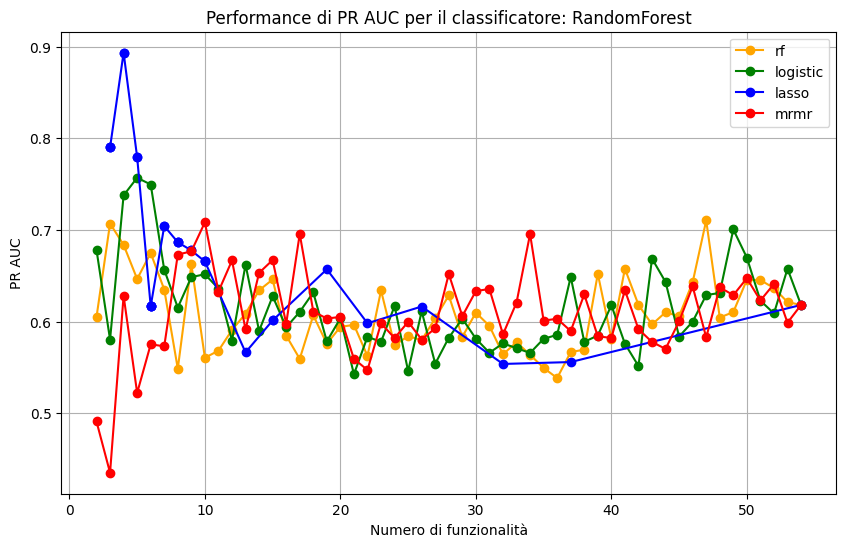

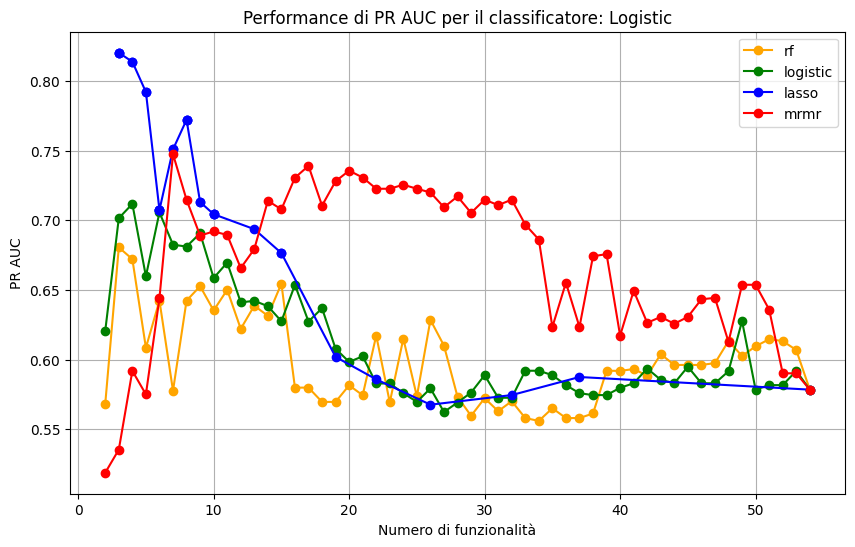

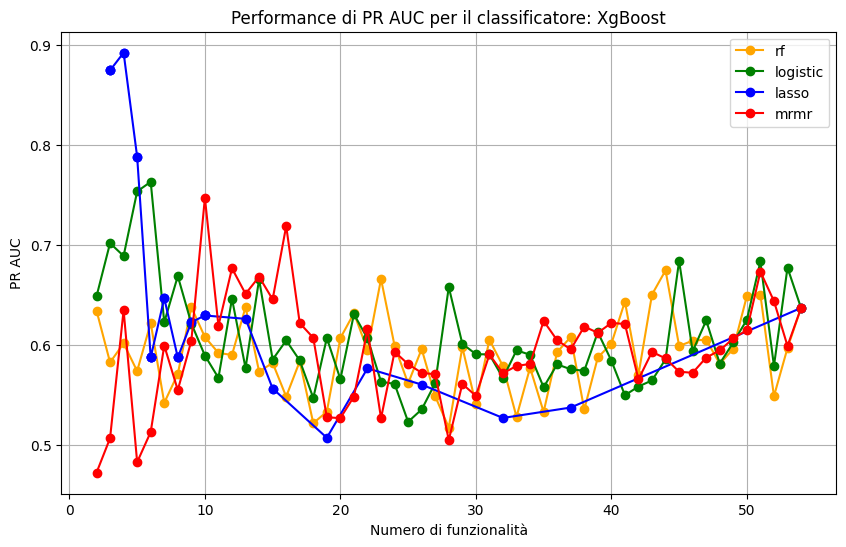

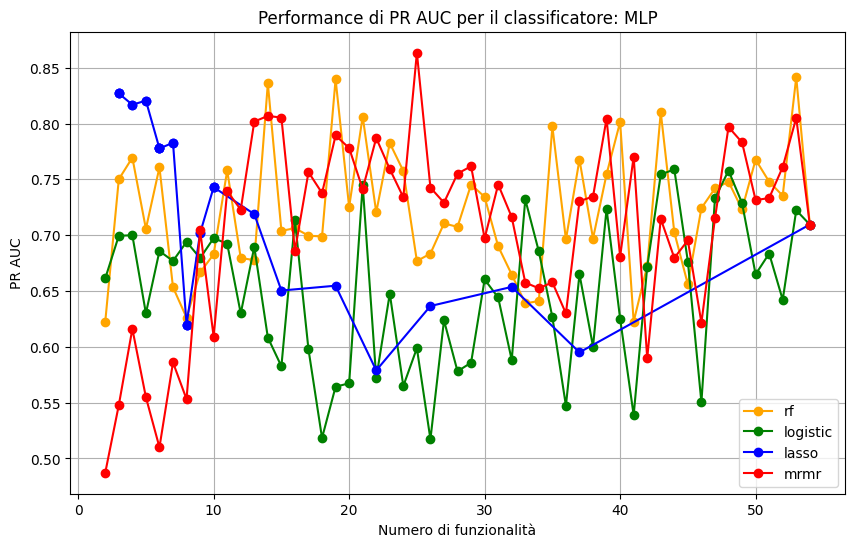

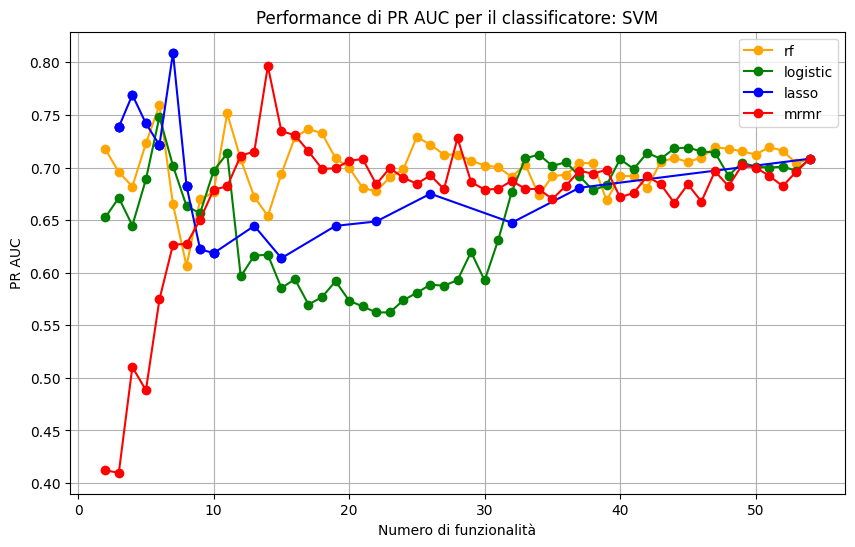

In [33]:
import matplotlib.pyplot as plt

# Definizione di colori diversi per ogni selettore
colors = {
    'lasso': 'blue',
    'logistic': 'green',  # sostituire con il nome effettivo del selettore
    'mrmr': 'red',    # sostituire con il nome effettivo del selettore
    'rf': 'orange'
    # aggiungere altri selettori se necessario
}

# Itera attraverso i classificatori e crea i grafici
for i, classifier in enumerate(classifiers):
    plt.figure(figsize=(10, 6))
    for selector in selectors:
        
        
        
        num_features = results_val[i][selector]['num_features']
        pr_auc = results_val[i][selector]['pr_auc']

        plt.plot(num_features, pr_auc, marker='o', label=selector, color=colors.get(selector, 'black'))

    plt.title(f'Performance di PR AUC per il classificatore: {classifier}')
    plt.xlabel('Numero di funzionalità')
    plt.ylabel('PR AUC')
    plt.legend()
    plt.grid(True)
    plt.show()

## Selezione dei migliori casi per ogni classifier rispetto a tutti i selector

In [137]:
# Dizionario per memorizzare i migliori risultati per ogni classificatore
best_results_per_classifier = {classifier: {'selector': None, 'result': None} for classifier in classifiers}

# Funzione per confrontare i risultati e determinare se è migliore
def is_better(result, best_result):
    if 'result' not in best_result or best_result['result'] is None:
        return True
    
    if result['f1'] > best_result['result']['f1']:
        return True
    elif result['f1'] == best_result['result']['f1']:
        if result['pr_auc'] > best_result['result']['pr_auc']:
            return True
        elif result['pr_auc'] == best_result['result']['pr_auc']:
            if result['roc_auc'] > best_result['result']['roc_auc']:
                return True
            elif result['roc_auc'] == best_result['result']['roc_auc']:
                if result['accuracy'] > best_result['result']['accuracy']:
                    return True
                elif result['accuracy'] == best_result['result']['accuracy']:
                    if result['num_features'] > best_result['result']['num_features']:
                        return True
    return False

# Iterazione attraverso i classificatori e i selettori
for i, classifier in enumerate(classifiers):
    for selector in selectors:
        num_results = len(results_val[i][selector]['f1'])
           
        for j in range(num_results):
            current_result = {
                'classifier': classifier,
                'selector': selector,
                'f1': results_val[i][selector]['f1'][j],
                'pr_auc': results_val[i][selector]['pr_auc'][j],
                'roc_auc': results_val[i][selector]['roc_auc'][j],
                'accuracy': results_val[i][selector]['accuracy'][j],
                'num_features': results_val[i][selector]['num_features'][j],
                'confusion_matrix': results_val[i][selector]['confusion_matrix'][j],
                'best_precision': results_val[i][selector]['best_precision'][j],
                'best_recall': results_val[i][selector]['best_recall'][j],
                'roc_auc': results_val[i][selector]['roc_auc'][j],
                'f1': results_val[i][selector]['f1'][j],
                'accuracy': results_val[i][selector]['accuracy'][j],
                'confusion_matrix': results_val[i][selector]['confusion_matrix'][j],
                'best_threshold': results_val[i][selector]['best_threshold'][j],
                'selected_features': results_val[i][selector]['selected_features'][j]
            }
            
            if is_better(current_result, best_results_per_classifier[classifier]):
                best_results_per_classifier[classifier] = {
                    'selector': selector,
                    'result': current_result
                }

classifier_alphas = {}

# Stampare il miglior risultato per ogni classificatore
for classifier, best_result_info in best_results_per_classifier.items():
    best_result = best_result_info['result']
    best_selector = best_result_info['selector']
    
    print(f"Miglior risultato per il classificatore {classifier} (selector {best_selector}):")
    print(f"F1 score: {best_result['f1']}")
    print(f"PR AUC: {best_result['pr_auc']}")
    print(f"ROC AUC: {best_result['roc_auc']}")
    print(f"Accuracy: {best_result['accuracy']}")
    print(f"Numero di features: {best_result['num_features']}")
    print(f"Confusion Matrix:")
    print(best_result['confusion_matrix'])
    print(f"Best Precision: {best_result['best_precision']}")
    print(f"Best Recall: {best_result['best_recall']}")
    print(f"Best Threshold: {best_result['best_threshold']}")
    print(f"Selected Features: {best_result['selected_features']}")


        # Se il selettore è "lasso", recupera e stampa anche il valore di alpha
    if best_selector == 'lasso':
        # Trova l'indice del miglior risultato in results_val per il classificatore e selettore correnti
        idx = results_val[classifiers.index(classifier)][best_selector]['f1'].index(best_result['f1'])
        alpha_opt = results_val[classifiers.index(classifier)][best_selector]['alpha'][idx]
        print(f"Alpha: {alpha_opt}")
    else:
        alpha_opt = 0

    classifier_alphas[classifier] = alpha_opt
    
    print("--------------------")

    print("--------------------")


Miglior risultato per il classificatore RandomForest (selector lasso):
F1 score: 0.8275862068965518
PR AUC: 0.6866089587510915
ROC AUC: 0.7232142857142857
Accuracy: 0.8333333333333334
Numero di features: 8
Confusion Matrix:
[[13  3]
 [ 2 12]]
Best Precision: 0.8
Best Recall: 0.8571428571428571
Best Threshold: 0.49
Selected Features: [ 0  4 35 36 37 38 40 50]
Alpha: 0.002896551724137931
--------------------
--------------------
Miglior risultato per il classificatore Logistic (selector lasso):
F1 score: 0.8125000000000001
PR AUC: 0.6764581311393514
ROC AUC: 0.7589285714285714
Accuracy: 0.8
Numero di features: 15
Confusion Matrix:
[[11  5]
 [ 1 13]]
Best Precision: 0.7222222222222222
Best Recall: 0.9285714285714286
Best Threshold: 0.488
Selected Features: [ 0  4  6  9 13 18 22 35 36 37 38 40 43 50 52]
Alpha: 0.0012413793103448274
--------------------
--------------------
Miglior risultato per il classificatore XgBoost (selector lasso):
F1 score: 0.8
PR AUC: 0.8924864351334938
ROC AUC: 0.

## Estrazione migliore dei migliori

In [139]:
best_overall_result = None
best_overall_classifier = None
best_overall_selector = None

for classifier, best_result_info in best_results_per_classifier.items():
    if 'result' in best_result_info and best_result_info['result'] is not None:
        best_result = best_result_info['result']
        selector = best_result_info['selector']
        
        # Se non abbiamo ancora un miglior risultato globale, lo impostiamo direttamente
        if best_overall_result is None:
            best_overall_result = best_result
            best_overall_classifier = classifier
            best_overall_selector = selector
        else:
            # Altrimenti, confrontiamo i risultati per trovare il miglior classificatore globale
            if (best_result['f1'] > best_overall_result['f1'] or
                (best_result['f1'] == best_overall_result['f1'] and
                 best_result['pr_auc'] > best_overall_result['pr_auc']) or
                (best_result['f1'] == best_overall_result['f1'] and
                 best_result['pr_auc'] == best_overall_result['pr_auc'] and
                 best_result['roc_auc'] > best_overall_result['roc_auc']) or
                (best_result['f1'] == best_overall_result['f1'] and
                 best_result['pr_auc'] == best_overall_result['pr_auc'] and
                 best_result['roc_auc'] == best_overall_result['roc_auc'] and
                 best_result['accuracy'] > best_overall_result['accuracy']) or
                (best_result['f1'] == best_overall_result['f1'] and
                 best_result['pr_auc'] == best_overall_result['pr_auc'] and
                 best_result['roc_auc'] == best_overall_result['roc_auc'] and
                 best_result['accuracy'] == best_overall_result['accuracy'] and
                 best_result['num_features'] > best_overall_result['num_features'])):
                
                best_overall_result = best_result
                best_overall_classifier = classifier
                best_overall_selector = selector

# Salvare i dati desiderati per il migliore dei migliori
if best_overall_result is not None:
    best_threshold_fin = best_overall_result['best_threshold']
    selected_features_fin = best_overall_result['selected_features']
    alpha_fin = classifier_alphas[best_overall_classifier]

    print(f"Miglior classificatore globale: {best_overall_classifier} (selector {best_overall_selector})")
    print(f"Threshold: {best_threshold_fin}")
    print(f"Selected Features: {selected_features_fin}")
    print(f"Alpha: {alpha_fin}")

else:
    print("Nessun miglior risultato globale trovato.")


Miglior classificatore globale: RandomForest (selector lasso)
Threshold: 0.49
Selected Features: [ 0  4 35 36 37 38 40 50]
Alpha: 0.002896551724137931


## Stampa miglior classifier con test

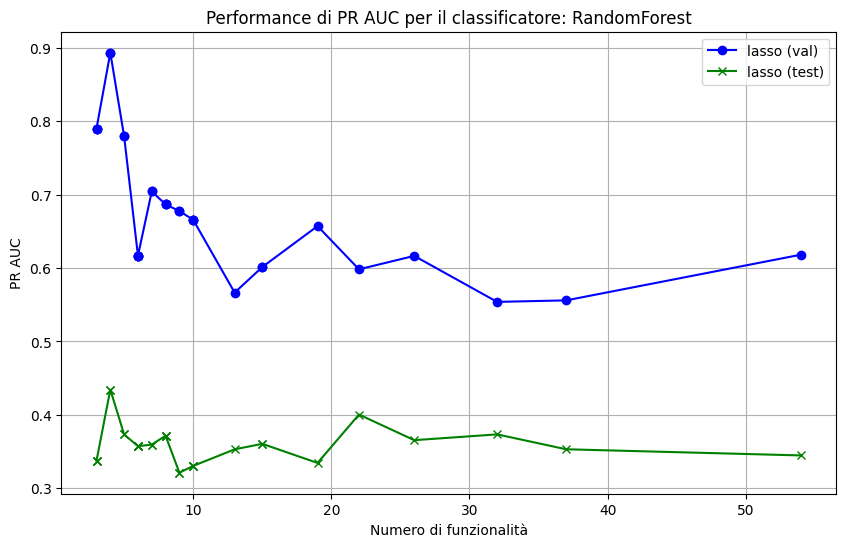

In [125]:
import matplotlib.pyplot as plt

# Dati da utilizzare per il grafico
classifier = best_overall_classifier
selector = best_overall_selector


# Recupera i dati di PR AUC e numero di features per results_val e results_test
num_features_val = results_val[classifiers.index(classifier)][selector]['num_features']
pr_auc_val = results_val[classifiers.index(classifier)][selector]['pr_auc']

num_features_test = results_test[classifiers.index(classifier)][selector]['num_features']
pr_auc_test = results_test[classifiers.index(classifier)][selector]['pr_auc']

# Definizione di colori diversi per validazione e test
color_val = 'blue'
color_test = 'green'

plt.figure(figsize=(10, 6))

# Plot per results_val (validazione)
plt.plot(num_features_val, pr_auc_val, marker='o', label=f'{selector} (val)', color=color_val)

# Plot per results_test (test)
plt.plot(num_features_test, pr_auc_test, marker='x', label=f'{selector} (test)', color=color_test)

plt.title(f'Performance di PR AUC per il classificatore: {classifier}')
plt.xlabel('Numero di funzionalità')
plt.ylabel('PR AUC')
plt.legend()
plt.grid(True)
plt.show()


## Test con training intero

In [165]:
#patients_train, patients_test, y_train, y_test, features_train, features_test= train_test_split(loaded_patients, labels, patients, test_size=0.2, shuffle=False, random_state=1)

if(best_overall_classifier=='RandomForest'):
         classi = RandomForestClassifier(n_estimators=100, random_state=42)
if(best_overall_classifier=='Logistic'):
                             classi = LogisticRegression()
if(best_overall_classifier=='SVM'):
                             classi = SVC(kernel='rbf', probability=True, random_state=42)
if(best_overall_classifier=='XgBoost'):
                             classi = XGBClassifier()
if(best_overall_classifier=='MLP'):
                             classi = MLPClassifier(hidden_layer_sizes=(128,64, 32), max_iter=1000, random_state=42, early_stopping=True, learning_rate='adaptive')

#x_train_expanded, y_train_expanded, _= continue_array(features_train1, y_train1)

sf = stringhe_numeri = [str(f) for f in selected_features_fin]

final_patients_train = keep_features_in_patients(features_train1, sf)

x_train_expanded, y_train_expanded, _ = continue_array(final_patients_train, y_train1)

features_test_fin = keep_features_in_patients(features_test, sf)

f1_final, precision_final, recall_final, conf_final, accuracy_final= classification_method2(classi, x_train_expanded, y_train_expanded, patients_test, y_test, features_test_fin, best_threshold_fin)

print(f"classifier: {best_overall_classifier}")
print(f"selector: {best_overall_selector}")
print(f"F1 score finale: {f1_final}")
print(f"Precision finale: {precision_final}")
print(f"Recall finale: {recall_final}")
print("Confusion Matrix finale:")
print(conf_final)
print(f"Accuracy finale: {accuracy_final}")
print(f"threshold: {best_threshold_fin}")
print(f"features: {selected_features} e sono {len(selected_features)}")





classifier: RandomForest
selector: lasso
F1 score finale: 0.4210526315789474
Precision finale: 0.36363636363636365
Recall finale: 0.5
Confusion Matrix finale:
[[10  7]
 [ 4  4]]
Accuracy finale: 0.56
threshold: 0.49
features: [ 0  4 35 36 37 38 40 50] e sono 8
